# Biodiversity in National Parks

### Author: Alexander K.

## Overview
This project interprets data from the National Parks Service about endangered species in different parks.


## Project Goals
- Performing data analysis on the conservation statuses of endangered species
- Investigate the patterns related to the types of species that become endangered
- Visualize the data to understand trends and distributions of endangered species across different national parks


## Actions

- analyze data;
- clean up the datasets;
- visualize the data using graphs and charts;
- seek to answer the questions;
- making conclusions based on the analysis.

## Data

There are two datasets:
1. Species data - contains information about different species, including their conservation status.
2. Observations data - contains records of species observed in various national parks, including the date and location of the observation.

## Analysis

fill in later

In [64]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# setting options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

In [66]:
# load the datasets

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

## Exploratory Data Analysis (EDA)

### Species and Conservation Status

In [67]:
# inspecting species dataset
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [68]:
# inspecting species dataset
print(f"The shape of the species dataset is - {species.shape}")
print()
print(species.info())

The shape of the species dataset is - (5824, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [69]:
species.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

There are 5824 rows and 4 columns in the species dataset:
* category - class of animal
* scientific_name - the scientific name of each species
* common_name - the common names of each species
* conservation_status - each species’ current conservation status

In [70]:
# count scientific_name values
species['scientific_name'].value_counts()

scientific_name
Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: count, Length: 5541, dtype: int64

In [71]:
# drop common_names column
species_drop = species.drop(columns=['common_names'])
species_drop.head()

,category,scientific_name,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,NaN
1,Mammal,Bos bison,NaN
2,Mammal,Bos taurus,NaN
3,Mammal,Ovis aries,NaN
4,Mammal,Cervus elaphus,NaN


In [72]:
# check for duplicates
species_drop[species_drop.duplicated(keep='last')]['scientific_name'].value_counts()

scientific_name
Streptopelia decaocto                 2
Myotis lucifugus                      2
Hypochaeris radicata                  2
Puma concolor                         2
Columba livia                         2
                                     ..
Rorippa palustris ssp. fernaldiana    1
Sisymbrium officinale                 1
Thlaspi arvense                       1
Amaranthus albus                      1
Agrostis variabilis                   1
Name: count, Length: 273, dtype: int64

In [73]:
# check for one value scientific_name
species_drop[species_drop['scientific_name']=='Oncorhynchus mykiss']

,category,scientific_name,conservation_status
560,Fish,Oncorhynchus mykiss,NaN
3283,Fish,Oncorhynchus mykiss,Threatened


In [74]:
# drop duplicates by scientific_name and keep last value
species_drop = species_drop.drop_duplicates(subset='scientific_name', keep='last')
print(f"The shape of the species dataset without scientific_name duplicates is - {species_drop.shape}")

The shape of the species dataset without scientific_name duplicates is - (5541, 3)


In [75]:
# checking
species_drop.value_counts()

category        scientific_name     conservation_status
Amphibian       Anaxyrus canorus    Threatened             1
Vascular Plant  Abronia ammophila   Species of Concern     1
Mammal          Myotis thysanodes   Species of Concern     1
                Myotis volans       Species of Concern     1
                Myotis yumanensis   Species of Concern     1
                                                          ..
Bird            Picoides borealis   Endangered             1
                Picoides pubescens  Species of Concern     1
                Pipilo chlorurus    Species of Concern     1
                Piranga rubra       Species of Concern     1
Vascular Plant  Zizia trifoliata    Species of Concern     1
Name: count, Length: 179, dtype: int64

In [76]:
# creating the data frame with only conservation species
conservation_species = species_drop[~species_drop['conservation_status'].isna()].sort_values('scientific_name')
conservation_species.shape


(179, 3)

In [77]:
species_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 0 to 5823
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   conservation_status  179 non-null    object
dtypes: object(3)
memory usage: 173.2+ KB


In [79]:
# counting the number of values in the 'category' column
species_drop['category'].value_counts()

category
Vascular Plant       4262
Bird                  488
Nonvascular Plant     333
Mammal                176
Fish                  125
Amphibian              79
Reptile                78
Name: count, dtype: int64

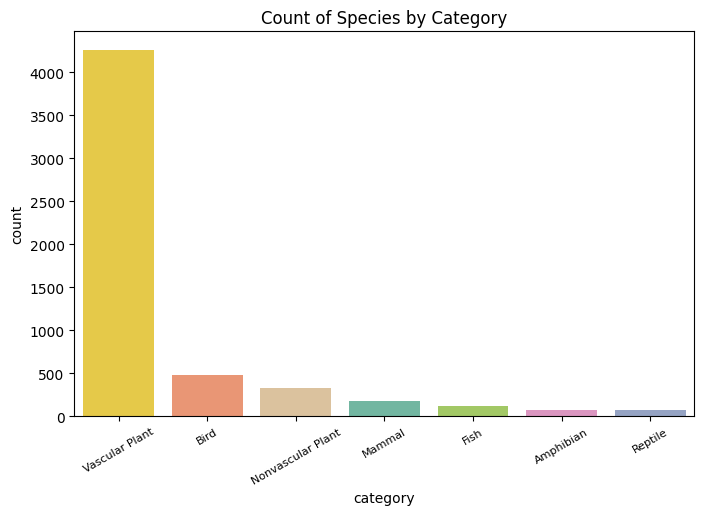

In [80]:
# creating a countplot for the 'category' column
plt.figure(figsize=(8, 5), frameon=True)
sns.countplot(data=species_drop, x='category', hue='category', palette='Set2', order=species['category'].value_counts().index, legend=False)
plt.title('Count of Species by Category')
plt.xticks(rotation=30, fontsize=8)
plt.show()

In [81]:
# count the total number of conservation species
species_drop['conservation_status'].value_counts()

conservation_status
Species of Concern    151
Endangered             15
Threatened             10
In Recovery             3
Name: count, dtype: int64

In [82]:
# select category and conservation status, group by conservation_status, and count category status
# using .unstack() to pivot the table; fill missing values with 0
conservationCategory = species_drop[['category', 'conservation_status']].groupby('conservation_status').value_counts().unstack().fillna(0).astype(int)
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,6,0,0,1
In Recovery,0,3,0,0,0,0,0
Species of Concern,4,68,4,22,5,5,43
Threatened,2,0,4,2,0,0,2


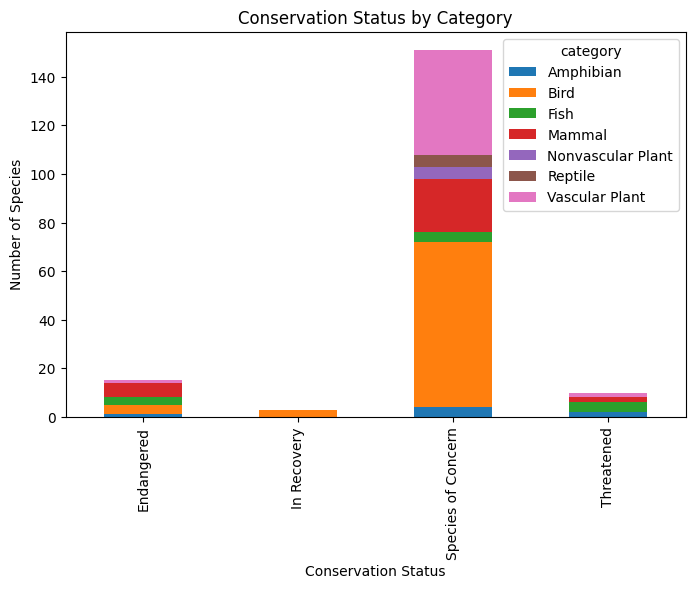

In [83]:
# creating stacked bar plot for conservation status by category
conservationCategory.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Conservation Status by Category')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.show()

### Insights from species data

The species dataset contains information about animal and plant species living in U.S. national parks, including their conservation status.

The data shows that 179 out of 5,541 species have been assigned some form of conservation status. This represents approximately 3.23% of all species in the dataset.

The most prevalent category is Vascular Plants, with a total of 4,262 species. Other notable groups include Birds, Nonvascular Plants, and Mammals. The smallest categories are Reptiles and Amphibians.

Around 200 species have been assigned a conservation status. The most common status is Species of Concern, where birds make up the largest share. Vascular Plants and Mammals also represent a significant portion of this category.

Among endangered species, mammals are the most represented group, followed by birds and fish.

The In Recovery status applies to only 3 species across all national parks. The are three bird species.

If environmental conditions remain unchanged in the coming years, several species of Amphibians, Mammals, Fish, and Vascular Plants may move into the endangered category.

### Observations data

In [84]:
# inspecting observations dataset
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [85]:
# inspecting observations dataset
print(f"The shape of the observations dataset is - {observations.shape}")
print()
print(observations.info())

The shape of the observations dataset is - (23296, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [86]:
observations.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

There are 23296 rows and 3 columns in the observations dataset:
* scientific_name - the scientific name of each species
* park_name - Park where species were found
* observations - the number of times each species was observed at park

In [ ]:
# checking duplicates in observations dataset
observations[observations.duplicated(subset=['scientific_name', 'park_name'], keep=False)] \
	.sort_values(by='scientific_name') \
	.head(10)

,scientific_name,park_name,observations
792,Agrostis capillaris,Great Smoky Mountains National Park,84
7750,Agrostis capillaris,Yosemite National Park,182
17735,Agrostis capillaris,Yosemite National Park,140
4864,Agrostis capillaris,Bryce National Park,105
6166,Agrostis capillaris,Yellowstone National Park,241
17428,Agrostis capillaris,Great Smoky Mountains National Park,97
3993,Agrostis capillaris,Bryce National Park,103
10379,Agrostis capillaris,Yellowstone National Park,267
17535,Agrostis gigantea,Yosemite National Park,128
13907,Agrostis gigantea,Yosemite National Park,148


In [ ]:
# agregating observations by scientific_name and park_name
# summing the observations for each group
observations_clean = observations.groupby(['scientific_name', 'park_name'], as_index=False)['observations'].sum()
print(f"The shape of the cleaned observations dataset is - {observations_clean.shape}")

The shape of the cleaned observations dataset is - (22164, 3)


In [ ]:
# checking for duplicates in cleaned observations dataset
observations_clean.duplicated().any()

False

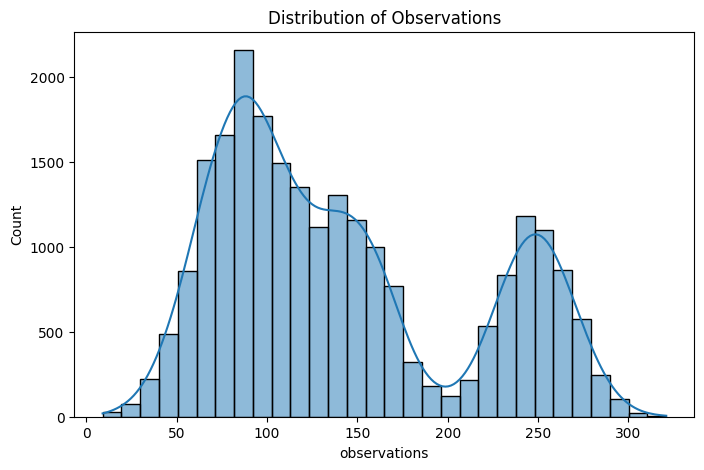

In [89]:
# making the histogram for the observations
plt.figure(figsize=(8, 5), frameon=True)
sns.histplot(data=observations, x='observations', bins=30, kde=True)
plt.title('Distribution of Observations')
plt.show()

In [90]:
# counting the number of observations by park
observationsByPark = observations.groupby('park_name')['observations'].sum().reset_index()
# renaming the column for clarity
observationsByPark.rename(columns={'observations': 'total_observations'}, inplace=True)
observationsByPark.sort_values(by='total_observations', ascending=False, inplace=True)
observationsByPark

,park_name,total_observations
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820


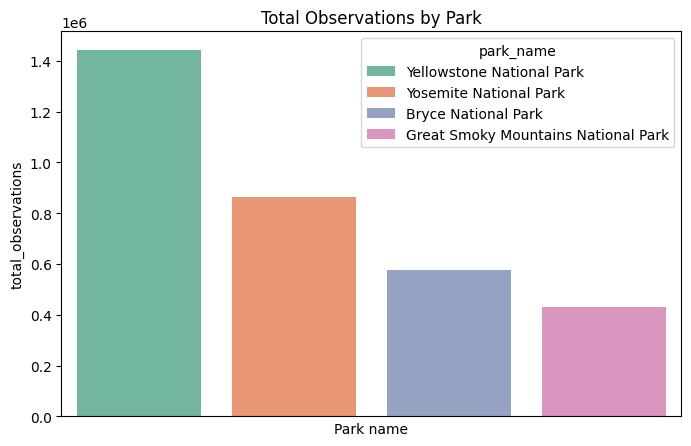

In [91]:
# creating a bar plot for observations by park
plt.figure(figsize=(8, 5), frameon=True)
sns.barplot(data=observationsByPark, x='park_name', y='total_observations', hue='park_name', palette='Set2', legend=True)
plt.title('Total Observations by Park')
plt.xlabel('Park name')
plt.xticks([])
plt.show()

In [92]:
# most observed species
# find the index of the maximum observations for each park
idx = observations.groupby('park_name')['observations'].idxmax() 
# select the rows with the maximum observations
mostObservedSpeciesByPark = observations.loc[idx, ['park_name', 'scientific_name', 'observations']]
mostObservedSpeciesByPark

,park_name,scientific_name,observations
13138,Bryce National Park,Valerianella radiata,176
8840,Great Smoky Mountains National Park,Sonchus asper ssp. asper,147
11281,Yellowstone National Park,Lycopodium tristachyum,321
6682,Yosemite National Park,Ivesia shockleyi var. shockleyi,223


In [93]:
# least observed species
# find the index of the min observations for each park
idx = observations.groupby('park_name')['observations'].idxmin() 
# select the rows with the minimum observations
leastObservedSpeciesByPark = observations.loc[idx, ['park_name', 'scientific_name', 'observations']]
leastObservedSpeciesByPark

,park_name,scientific_name,observations
9418,Bryce National Park,Corydalis aurea,9
15511,Great Smoky Mountains National Park,Collomia tinctoria,10
10848,Yellowstone National Park,Grus americana,57
16618,Yosemite National Park,Noturus baileyi,31


### Insights from observations data

The observations dataset contains records of species observed in 4 national parks: Great Smoky Mountains, Bryce, Yosemite, Yellowstone.

The Yellowstone National Park has the highest number of observations, with a total of 1,443,562. The most observed species is Lycopodium tristachyum with 321 observations. The least observed species is Grus americana with 59 observations.

The Great Smoky Mountains National Park has the last number of observations. The total number of observations is 431,820. The Sonchus asper ssp. asper is the most observed species with 147 observations, while the least observed species is Collomia tinctoria with only 10 observations.

### Merging datasets

In [94]:
# merging datasets
df = pd.merge(observations,
              species,
              left_on='scientific_name', 
              right_on='scientific_name',
              how='left')

print(f"The shape of the merged dataset is - {df.shape}")
print()
print(df.info())

The shape of the merged dataset is - (25632, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None


In [95]:
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN


In [96]:
# filling null values in the 'observations' column with 0
df['observations'] = df['observations'].fillna(0)
# filtering by count observations
filtObservations = df['observations'] < 12
df.loc[filtObservations, ('scientific_name', 'park_name', 'observations')]

,scientific_name,park_name,observations
10368,Corydalis aurea,Bryce National Park,9
17093,Collomia tinctoria,Great Smoky Mountains National Park,10
17681,Strix occidentalis,Great Smoky Mountains National Park,11
20710,Rana sierrae,Great Smoky Mountains National Park,11
